<h1><center>Exploring the Complex Relationship Between Suicide Rates and Socioeconomic and Other Potential Factors</center></h1> 

### Group Members: Julius Angelo, Wadood Butt, and Daniel Chung

## Introduction

### The Issue of Suicide

Suicide is ranked 4th in the leading causes of death for 15–29-year-olds all over the world, claiming over 700,000 people yearly. Despite the large number of suicides, it is a major issue that has not been properly addressed until relatively recently, according to the [World Health Organization](https://www.who.int/news-room/fact-sheets/detail/suicide). Mental health is an important, yet almost-taboo, topic for people all over the world. Exploring the demographics, potential causes, analyzing potential sources, and discovering more information are all tantamount in addressing the preventable death of suicide. Gaining insight into suicide can prove valuable, as it allows us to address these causes head-on. A dive into the data for suicide and its factors are important for bringing awareness to the issue and developing mitigation strategies. 

Identifying potential trends and gaining more insight on suicide has proven to help lower suicide rates over the years. According to [Our World in Data](https://ourworldindata.org/suicide), the recent trend in suicides decreasing can be attributed to the greater drive in awareness, restricting methods used for suicide, and help for those who are suicidal. There are other factors, such as mental health treatment; however, our project is limited in what it can do: it will only inform in regards to causes and trends.

### Purpose and Focus

This project will explore statistics in regards to suicide and focus on trying to identify various factors, potential causes (backed by evidence), and details that surround this issue. More specifically, this project will compare variables that may be a factor for people who commit suicide, such as GDP (Gross Domestic Product), GDP per capita, sex, race, and age. Looking at these particular demographics can help us determine which groups of people suffer the most from suicide. 

### Data Science Lifecycle

Steps of the data Science Lifecycle:
1. Data Collection
2. Data Processing
3. Exploratory Analysis & Data Visualization
4. Analysis, Hypothesis Testing, & Machine Learning
5. Insight & Policy Decision

We will walk through the data science lifecycle throughout this tutorial. The steps of the data science lifecycle will be followed as we parse through large datasets to find meaningful takeaways about the factors that may contribute to suicide rates. Many data science projects, including ours, uses [Jupyter Notebook](https://docs.jupyter.org/en/latest/index.html) as a tool that can easily show the workflow of a project. 


## Data Collection

Data collection is the first step of the data science lifecycle, and it is important to source datasets from reliable sources so that the results of the data analysis are not biased. Our datasets are sourced primarily from the [World Bank](https://www.worldbank.org/en/home), which is an international partnership that provides loans to lower income countries for capital projects to reduce poverty and build prosperity. We also have a dataset from the [Centers for Disease Control and Prevention (CDC)](https://www.cdc.gov/), which is a U.S. organization tasked with protecting the public’s health. These datasets have information on factors such as suicide rates by country, GDP, sex, and race.

Sources of Data:

https://data.worldbank.org/indicator/SH.STA.SUIC.P5 -- Global/U.S. Suicide

https://data.worldbank.org/indicator/NY.GDP.MKTP.CD -- Global/U.S. GDP

https://data.worldbank.org/indicator/SI.POV.GINI -- Gini Global Data

https://data.cdc.gov/NCHS/Death-rates-for-suicide-by-sex-race-Hispanic-origi/9j2v-jamp -- United States' Sex/Race/Gender vs Suicide

https://www.kaggle.com/datasets/prasertk/homicide-suicide-rate-and-gdp -- Global Homicide v. Suicide v. GDP (They got their data from WorldBank)

In the next section, we get the data and process it. 

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import requests
from plotnine import *
import regex as re
import io
import requests
import warnings

In [2]:
# suppress warnings
warnings.filterwarnings('ignore') 

## Data Processing

After retrieving the datasets, we must tidy them for analysis. This section of the tutorial uses two Python libraries, [pandas](https://pandas.pydata.org/docs/) and [NumPy](https://numpy.org/doc/stable/), to clean the data. 

### Getting and Cleaning Global Suicide and GDP data

Gross Domestic Product (GDP) is a measure of the monetary value of final goods and services produced in a country in a given period of time. GDP per capita is GDP per person, which is a prosperity measure for a country. In particular, we use GDP per capita at purchasing power parity (PPP), which is used to compare living standards since PPP accounts for different costs of living and inflation in different countries. You can learn more about measures of GDP [here](https://en.wikipedia.org/wiki/Gross_domestic_product). 

#### Get Global Suicide and GDP data

In [3]:
# read raw data from csv file
raw_data = pd.read_csv('./datasets/suicide homicide gdp.csv', sep=',')

# display the raw DataFrame
display(raw_data)

,country,iso3c,iso2c,year,"Intentional homicides (per 100,000 people)","Suicide mortality rate (per 100,000 population)",GDP (current US$),"GDP per capita, PPP (current international $)",adminregion,incomeLevel
0,Afghanistan,AFG,AF,1970,NaN,NaN,1.748887e+09,NaN,South Asia,Low income
1,Afghanistan,AFG,AF,1971,NaN,NaN,1.831109e+09,NaN,South Asia,Low income
2,Afghanistan,AFG,AF,1972,NaN,NaN,1.595555e+09,NaN,South Asia,Low income
3,Afghanistan,AFG,AF,1973,NaN,NaN,1.733333e+09,NaN,South Asia,Low income
4,Afghanistan,AFG,AF,1974,NaN,NaN,2.155555e+09,NaN,South Asia,Low income
...,...,...,...,...,...,...,...,...,...,...
13561,Zimbabwe,ZWE,ZW,2016,NaN,16.8,2.054868e+10,2806.469032,Sub-Saharan Africa (excluding high income),Lower middle income
13562,Zimbabwe,ZWE,ZW,2017,NaN,15.0,1.758489e+10,3795.642431,Sub-Saharan Africa (excluding high income),Lower middle income
13563,Zimbabwe,ZWE,ZW,2018,NaN,14.0,1.811554e+10,4017.221716,Sub-Saharan Africa (excluding high income),Lower middle income
13564,Zimbabwe,ZWE,ZW,2019,NaN,14.1,1.928429e+10,3783.547898,Sub-Saharan Africa (excluding high income),Lower middle income


#### Cleaning Global Suicide and GDP data

First, we want to get and tidy the global suicide data. Our columns of interest in the raw dataset are Suicide mortality rate (per 100,000 population), GDP (current US dollars), and GDP per capita, PPP (current international US dollars), which are renamed for brevity. 

In [4]:
# define variable names for the data columns
homicides = 'Intentional homicides (per 100,000 people)'
suicides = 'Suicide mortality rate (per 100,000 population)'
gdp = 'GDP (current US$)'
gdp_pc = 'GDP per capita, PPP (current international $)'

# define labels for visualization purposes
suicide_label = 'Suicide Rate Per 100,000 People'
gdp_pc_label = 'GDP Per Capita in US Dollars (Inflation-Adjusted)'

# drop rows with missing values in the 'suicides' and 'incomeLevel' columns
data1 = raw_data.dropna(subset=[suicides, 'incomeLevel'])

# remove rows that don't meet certain conditions: 
# - year must be greater than or equal to 2000
# - incomeLevel must not be 'Aggregates' or 'Not classified'
data1 = data1.drop(data1[(data1['year'] < 2000) | (data1['incomeLevel'] == 'Aggregates') | (
    data1['incomeLevel'] == 'Not classified')].index)

# drop unnecessary columns
data1 = data1.drop(columns=[homicides, 'iso3c', 'iso2c'])

# rename columns for consistency and clarity
data1 = data1.rename(
    columns={f'{gdp}': 'gdp', f'{gdp_pc}': 'gdp_pc', f'{suicides}': 'suicides'})

# remove rows where the country is 'World'
data1 = data1[data1['country'] != 'World']

# reset the index of the DataFrame after removing rows
data1 = data1.reset_index(drop=True)

# display the resulting DataFrame
display(data1)


,country,year,suicides,gdp,gdp_pc,adminregion,incomeLevel
0,Afghanistan,2000,4.9,NaN,NaN,South Asia,Low income
1,Afghanistan,2001,5.0,NaN,NaN,South Asia,Low income
2,Afghanistan,2002,5.0,4.055180e+09,877.014268,South Asia,Low income
3,Afghanistan,2003,5.0,4.515559e+09,927.857548,South Asia,Low income
4,Afghanistan,2004,5.0,5.226779e+09,925.441429,South Asia,Low income
...,...,...,...,...,...,...,...
3635,Zimbabwe,2015,18.0,1.996312e+10,2679.507615,Sub-Saharan Africa (excluding high income),Lower middle income
3636,Zimbabwe,2016,16.8,2.054868e+10,2806.469032,Sub-Saharan Africa (excluding high income),Lower middle income
3637,Zimbabwe,2017,15.0,1.758489e+10,3795.642431,Sub-Saharan Africa (excluding high income),Lower middle income
3638,Zimbabwe,2018,14.0,1.811554e+10,4017.221716,Sub-Saharan Africa (excluding high income),Lower middle income


Next, we create two cleaned datasets with the mean suicide rates, mean GDP, and mean GDP per capita. One is grouped by country, and one is grouped by year. From those cleaned datasets, we can compare countries and general trends over time. 

In [5]:
# calculate the mean values of 'suicides', 'gdp', and 'gdp_pc' across countries and income levels
means_across_country = data1.groupby(['country', 'incomeLevel'])[['suicides', 'gdp', 'gdp_pc']].mean().reset_index()

# calculate the mean values of 'suicides', 'gdp', and 'gdp_pc' across years and income levels
means_across_time = data1.groupby(['year', 'incomeLevel'])[['suicides', 'gdp', 'gdp_pc']].mean().reset_index()

# display the resulting DataFrame that shows means across countries and income levels
display(means_across_country)

# display the resulting DataFrame that shows means across years and income levels
display(means_across_time)

,country,incomeLevel,suicides,gdp,gdp_pc
0,Afghanistan,Low income,4.460,1.368449e+10,1590.205477
1,Albania,Upper middle income,5.875,1.035320e+10,8810.190584
2,Algeria,Lower middle income,3.330,1.409770e+11,11661.982095
3,Angola,Lower middle income,7.310,7.622280e+10,6011.694445
4,Antigua and Barbuda,High income,0.655,1.188067e+09,20205.652180
...,...,...,...,...,...
177,Vanuatu,Lower middle income,18.750,5.983245e+08,2645.018747
178,Vietnam,Lower middle income,6.940,1.242308e+11,4492.639897
179,"Yemen, Rep.",Low income,5.815,2.474981e+10,3525.223533
180,Zambia,Lower middle income,10.200,1.667534e+10,2822.771255


,year,incomeLevel,suicides,gdp,gdp_pc
0,2000,High income,13.941176,5.308934e+11,28417.190469
1,2000,Low income,8.348148,7.361866e+09,1102.303458
2,2000,Lower middle income,10.557407,2.835959e+10,2942.269817
3,2000,Upper middle income,12.100000,8.619339e+10,7163.240052
4,2001,High income,13.731373,5.260995e+11,29223.902058
...,...,...,...,...,...
75,2018,Upper middle income,9.350000,4.725870e+11,17202.977805
76,2019,High income,11.168627,1.055134e+12,48738.547358
77,2019,Low income,6.488889,1.742048e+10,1924.373552
78,2019,Lower middle income,9.687037,1.429378e+11,6552.216990


### Getting and Cleaning U.S. Sex, Race, and Gender Suicide data

We are now cleaning a dataset from the U.S. that has suicides and peoples’ sex, race, and gender. Our columns of interest are age, sex, race, and ethnicity, so we drop the rest. 


#### Get U.S. Sex, Race, and Gender Suicide data

In [6]:
# read raw data from csv file
raw_data = pd.read_csv('./datasets/sex_race_gender_suicide_data_us.csv')

# display the raw DataFrame
display(raw_data)

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
0,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.000,1950,1,All ages,0.0,13.2,NaN
1,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.000,1960,2,All ages,0.0,12.5,NaN
2,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.000,1970,3,All ages,0.0,13.1,NaN
3,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.000,1980,4,All ages,0.0,12.2,NaN
4,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.000,1981,5,All ages,0.0,12.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6385,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Not Hispanic or Latino: Black or Afric...,7.225,2018,42,65 years and over,5.0,1.3,NaN
6386,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Hispanic or Latino: All races: 15-24 y...,7.232,2018,42,15-24 years,2.0,4.1,NaN
6387,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Hispanic or Latino: All races: 25-44 y...,7.233,2018,42,25-44 years,3.0,4.4,NaN
6388,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Hispanic or Latino: All races: 45-64 y...,7.234,2018,42,45-64 years,4.0,3.2,NaN


#### Cleaning U.S. Sex, Race, and Gender Suicide data

Next, we get and clean a dataset from the U.S. that has suicides and peoples’ sex, race, and gender. Our interest is in age, sex, race, and ethnicity, so we drop the rest. We use the "STUB_LABEL" column and a regex later on to get data about sex, race, and gender. We make new columns for sex, race, and ethnicity using a regex. After we do this, sex, race, and ethnicity can be easily accessed from the data frame. 

In [7]:
# drop rows with missing values in the 'ESTIMATE' column
data2 = raw_data.dropna(subset=['ESTIMATE'])

# remove rows that meet specific conditions: 
# - UNIT_NUM must be 1
# - YEAR must be less than 2000
data2 = data2.drop(data2[(data2['UNIT_NUM'] == 1) | (data2['YEAR'] < 2000)].index)

# drop unnecessary columns: 'UNIT', 'INDICATOR', 'UNIT_NUM', 'AGE_NUM', 'YEAR_NUM', 'FLAG'
data2 = data2.drop(columns=['UNIT', 'INDICATOR', 'UNIT_NUM', 'AGE_NUM', 'YEAR_NUM', 'FLAG'], axis=1)

# extracts the category of interest from a row
def find_cat(category, str, label):
    match = re.search(str, label)
    if match == None:
        return 'All ' + category
    else:
        return match.group()

re_str = r'(Male|Female)'
data2['SEX'] = data2['STUB_LABEL'].apply(lambda label: find_cat('sex', re_str, label))

re_str = r'(White|Black or African American|Asian or Pacific Islander|American Indian or Alaska Native)'
data2['RACE'] = data2['STUB_LABEL'].apply(lambda label: find_cat('race', re_str, label))

re_str = r'(Not Hispanic or Latino|Hispanic or Latino)'
data2['ETHNICITY'] = data2['STUB_LABEL'].apply(lambda label: find_cat('ethnicity', re_str, label))

# reset the index of the DataFrame after removing rows
data2 = data2.reset_index(drop=True)

# display the resulting DataFrame
display(data2)

,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,AGE,ESTIMATE,SEX,RACE,ETHNICITY
0,Total,0,All persons,0.000,2000,All ages,10.4,All sex,All race,All ethnicity
1,Total,0,All persons,0.000,2001,All ages,10.7,All sex,All race,All ethnicity
2,Total,0,All persons,0.000,2002,All ages,11.0,All sex,All race,All ethnicity
3,Total,0,All persons,0.000,2003,All ages,10.9,All sex,All race,All ethnicity
4,Total,0,All persons,0.000,2004,All ages,11.1,All sex,All race,All ethnicity
...,...,...,...,...,...,...,...,...,...,...
2628,"Sex, age and race and Hispanic origin (Single ...",11,Female: Not Hispanic or Latino: Black or Afric...,7.225,2018,65 years and over,1.3,Female,Black or African American,Not Hispanic or Latino
2629,"Sex, age and race and Hispanic origin (Single ...",11,Female: Hispanic or Latino: All races: 15-24 y...,7.232,2018,15-24 years,4.1,Female,All race,Hispanic or Latino
2630,"Sex, age and race and Hispanic origin (Single ...",11,Female: Hispanic or Latino: All races: 25-44 y...,7.233,2018,25-44 years,4.4,Female,All race,Hispanic or Latino
2631,"Sex, age and race and Hispanic origin (Single ...",11,Female: Hispanic or Latino: All races: 45-64 y...,7.234,2018,45-64 years,3.2,Female,All race,Hispanic or Latino


### Getting and Cleaning U.S. State Suicide and Gini Coefficient data

The [Gini coefficient](https://www.census.gov/topics/income-poverty/income-inequality/about/metrics/gini-index.html) is a measure of income inequality. It ranges from 0 (perfect equality of income) to 1 (perfect inequality of income). More specifically, it is a measure of statistical dispersion that represents income inequality. You can learn more about calculating the Gini Coefficient [here](https://en.wikipedia.org/wiki/Gini_coefficient#Calculation).

These are global datasets, but we only pull data regarding the United States.

#### Getting and Cleaning U.S. State Suicide, GDP, and Gini Coefficient data

First, we get and clean the GDP data for the states. We drop the irrelevant columns and rows and extract the United States data.

In [8]:
# Extracting the data for global gdp
gdp_states = requests.get('https://raw.githubusercontent.com/wadoodbutt/wadoodbutt.github.io/main/datasets/statesgdp.csv')

file_gdp_states = io.StringIO(gdp_states.text)

df_gdp_states = pd.read_csv(file_gdp_states, sep=',')
# Filthy, uncleaned data
display(df_gdp_states)
# Cleaning up the data / Rerranging the columns 
# Making aow the column headers then removing 3 irrelevant rows
df_gdp_states.columns = df_gdp_states.iloc[3]
df_gdp_states = df_gdp_states.drop([0,1,2,3])
df_gdp_states = df_gdp_states.reset_index(drop=True)
# Drop irrelevant columns and keeping the year and number of suicide columns 
df_gdp_states = df_gdp_states.drop(df_gdp_states.iloc[:, 4:44], axis=1)
# Extract united states data from global data
display(df_gdp_states.iloc[251])
display(df_gdp_states)

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Last Updated Date,3/1/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Country Name,Country Code,Indicator Name,Indicator Code,1.960000e+03,1.961000e+03,1.962000e+03,1.963000e+03,1.964000e+03,1.965000e+03,...,2.012000e+03,2.013000e+03,2.014000e+03,2.015000e+03,2.016000e+03,2.017000e+03,2.018000e+03,2.019000e+03,2.020000e+03,2.021000e+03
4,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.615084e+09,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.202235e+09,3.368970e+09,2.610039e+09,3.126019e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6.163785e+09,6.735731e+09,7.074658e+09,6.295820e+09,6.682833e+09,7.180813e+09,7.878509e+09,7.899879e+09,7.716925e+09,9.412034e+09
266,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.540132e+10,4.041523e+10,4.322859e+10,4.244450e+10,3.131783e+10,2.684223e+10,2.160616e+10,NaN,NaN,NaN
267,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,8.748597e+09,9.225996e+09,9.813996e+09,1.085420e+10,1.195600e+10,1.306899e+10,...,4.344010e+11,4.008860e+11,3.811990e+11,3.467100e+11,3.235860e+11,3.814490e+11,4.041600e+11,3.885320e+11,3.376200e+11,4.190150e+11
268,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,2.550306e+10,2.803724e+10,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631159e+10,2.330867e+10,1.811063e+10,2.214763e+10


3
Country Name          United States
Country Code                    USA
Indicator Name    GDP (current US$)
Indicator Code       NY.GDP.MKTP.CD
2000.0             10250900000000.0
2001.0             10581900000000.0
2002.0             10929100000000.0
2003.0             11456400000000.0
2004.0             12217200000000.0
2005.0             13039200000000.0
2006.0             13815600000000.0
2007.0             14474200000000.0
2008.0             14769900000000.0
2009.0             14478100000000.0
2010.0             15049000000000.0
2011.0             15599700000000.0
2012.0             16254000000000.0
2013.0             16843200000000.0
2014.0             17550700000000.0
2015.0             18206000000000.0
2016.0             18695100000000.0
2017.0             19477300000000.0
2018.0             20533100000000.0
2019.0             21381000000000.0
2020.0             21060500000000.0
2021.0             23315100000000.0
Name: 251, dtype: object

3,Country Name,Country Code,Indicator Name,Indicator Code,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,1.873184e+09,1.896648e+09,1.962011e+09,2.044134e+09,2.254749e+09,2.359777e+09,...,2.615084e+09,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.202235e+09,3.368970e+09,2.610039e+09,3.126019e+09
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.839380e+11,2.588300e+11,2.648810e+11,3.526740e+11,4.388530e+11,5.122340e+11,...,9.720020e+11,9.826770e+11,1.003400e+12,9.231440e+11,8.898590e+11,1.030480e+12,1.016700e+12,1.009050e+12,9.341790e+11,1.089450e+12
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,3.854235e+09,4.539501e+09,5.220824e+09,6.226199e+09,...,2.020357e+10,2.056449e+10,2.055058e+10,1.999816e+10,1.801956e+10,1.889635e+10,1.841885e+10,1.890449e+10,2.014344e+10,1.478686e+10
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.404100e+11,1.467800e+11,1.766060e+11,2.044710e+11,2.534720e+11,3.100940e+11,...,7.360400e+11,8.322170e+11,8.924980e+11,7.669580e+11,6.905450e+11,6.837480e+11,7.663600e+11,7.947190e+11,7.848000e+11,8.401870e+11
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,9.129595e+09,8.936064e+09,1.528559e+10,1.781270e+10,2.355205e+10,3.697092e+10,...,1.249980e+11,1.334020e+11,1.372440e+11,8.721930e+10,4.984049e+10,6.897277e+10,7.779294e+10,6.930911e+10,5.361907e+10,6.740429e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6.163785e+09,6.735731e+09,7.074658e+09,6.295820e+09,6.682833e+09,7.180813e+09,7.878509e+09,7.899879e+09,7.716925e+09,9.412034e+09
262,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,9.652436e+09,9.861560e+09,1.069463e+10,1.177797e+10,1.387279e+10,1.674634e+10,...,3.540132e+10,4.041523e+10,4.322859e+10,4.244450e+10,3.131783e+10,2.684223e+10,2.160616e+10,NaN,NaN,NaN
263,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,1.517530e+11,1.354300e+11,1.290880e+11,1.970200e+11,2.558070e+11,2.888680e+11,...,4.344010e+11,4.008860e+11,3.811990e+11,3.467100e+11,3.235860e+11,3.814490e+11,4.041600e+11,3.885320e+11,3.376200e+11,4.190150e+11
264,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,3.600683e+09,4.094481e+09,4.193846e+09,4.901840e+09,6.221078e+09,8.331870e+09,...,2.550306e+10,2.803724e+10,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631159e+10,2.330867e+10,1.811063e+10,2.214763e+10


Next, we get the data for suicide rates in the States. We clean this up by dropping the columns and rows that we do not need. 

In [9]:
# Extracting the data for global suicide
sui_states = requests.get('https://raw.githubusercontent.com/wadoodbutt/wadoodbutt.github.io/main/datasets/statessuicide.csv')

file_sui_states = io.StringIO(sui_states.text)

df_sui_states = pd.read_csv(file_sui_states, sep=',')
# Uncleaned data
display(df_sui_states)

# Cleaning up the data / Rerranging the columns 
# Making aow the column headers then removing 3 irrelevant rows
df_sui_states.columns = df_sui_states.iloc[3]
df_sui_states = df_sui_states.drop([0,1,2,3])
df_sui_states = df_sui_states.reset_index(drop=True)
df_sui_states = df_sui_states.drop(df_sui_states.iloc[:, 4:44], axis=1)

# Extract united states data from global data
display(df_sui_states.iloc[251])

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Last Updated Date,3/1/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
4,Aruba,ABW,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,Kosovo,XKX,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,"Yemen, Rep.",YEM,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,5.7,5.7,5.7,5.5,5.7,5.6,5.9,5.8,NaN,NaN
267,South Africa,ZAF,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,22.9,23.7,24.1,24.5,24.4,25.2,24.1,23.5,NaN,NaN
268,Zambia,ZMB,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,9.4,9.1,9.0,8.7,8.5,8.5,8.1,7.3,NaN,NaN


3
Country Name                                        United States
Country Code                                                  USA
Indicator Name    Suicide mortality rate (per 100,000 population)
Indicator Code                                     SH.STA.SUIC.P5
2000.0                                                       11.0
2001.0                                                       11.4
2002.0                                                       11.8
2003.0                                                       11.7
2004.0                                                       11.9
2005.0                                                       11.9
2006.0                                                       12.1
2007.0                                                       12.4
2008.0                                                       12.7
2009.0                                                       12.8
2010.0                                                       13.1
2011.0  

The next step is to get the Gini Coefficient data for the States. The cleaning process is the same as above.

In [10]:
# Extracting the data for global suicide
gini_data = requests.get('https://raw.githubusercontent.com/wadoodbutt/wadoodbutt.github.io/main/datasets/gini_global_data.csv')

file_gini = io.StringIO(gini_data.text)

df_gini = pd.read_csv(file_gini, sep=',')

# Uncleaned data
display(df_gini)

# Cleaning up the data / Rerranging the columns 
# Making aow the column headers then removing 3 irrelevant rows
df_gini.columns = df_gini.iloc[3]
df_gini = df_gini.drop([0,1,2,3])
df_gini = df_gini.reset_index(drop=True)
df_gini = df_gini.drop(df_gini.iloc[:, 4:44], axis=1)
display(df_gini.iloc[251])

# Extract united states data from global data
display(df_gini)

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Last Updated Date,3/1/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
4,Aruba,ABW,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,Kosovo,XKX,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,29.0,26.3,27.3,26.5,26.7,29.0,NaN,NaN,NaN,NaN
266,"Yemen, Rep.",YEM,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,36.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,South Africa,ZAF,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268,Zambia,ZMB,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,57.1,NaN,NaN,NaN,NaN,NaN,NaN


3
Country Name      United States
Country Code                USA
Indicator Name       Gini index
Indicator Code      SI.POV.GINI
2000.0                     40.1
2001.0                     40.6
2002.0                     40.4
2003.0                     40.8
2004.0                     40.3
2005.0                     41.0
2006.0                     41.4
2007.0                     40.8
2008.0                     40.8
2009.0                     40.6
2010.0                     40.0
2011.0                     40.9
2012.0                     40.9
2013.0                     40.7
2014.0                     41.5
2015.0                     41.2
2016.0                     41.1
2017.0                     41.2
2018.0                     41.4
2019.0                     41.5
2020.0                     39.7
2021.0                      NaN
Name: 251, dtype: object

3,Country Name,Country Code,Indicator Name,Indicator Code,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
0,Aruba,ABW,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Gini index,SI.POV.GINI,52.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,51.3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Gini index,SI.POV.GINI,NaN,NaN,NaN,29.0,NaN,31.2,...,29.0,26.3,27.3,26.5,26.7,29.0,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,34.7,...,NaN,NaN,36.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,Gini index,SI.POV.GINI,57.8,NaN,NaN,NaN,NaN,64.8,...,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,Zambia,ZMB,Gini index,SI.POV.GINI,NaN,NaN,42.1,NaN,54.3,NaN,...,NaN,NaN,NaN,57.1,NaN,NaN,NaN,NaN,NaN,NaN


Combine and finalize the States' suicide and GDP data frame.

In [11]:
df_final = pd.DataFrame()

# Combining united states suicide and gdp
df_final['suicide'] = df_sui_states.iloc[251, 4:26].transpose() 
df_final['gdp'] = df_gdp_states.iloc[251, 4:26].transpose()
display(df_final)


,suicide,gdp
3,,
2000.0,11.0,10250900000000.0
2001.0,11.4,10581900000000.0
2002.0,11.8,10929100000000.0
2003.0,11.7,11456400000000.0
2004.0,11.9,12217200000000.0
2005.0,11.9,13039200000000.0
2006.0,12.1,13815600000000.0
2007.0,12.4,14474200000000.0
2008.0,12.7,14769900000000.0


Comebine and finalize the States' suicide and Gini Coefficient data frame.

In [12]:
df_final_g = pd.DataFrame()
# Combining gini index data (% based) vs suicide in united states
df_final_g['suicide'] = df_sui_states.iloc[251, 4:24].transpose() 
df_final_g['gini'] = df_gini.iloc[251, 4:24].transpose()

display(df_final_g)

,suicide,gini
3,,
2000.0,11.0,40.1
2001.0,11.4,40.6
2002.0,11.8,40.4
2003.0,11.7,40.8
2004.0,11.9,40.3
2005.0,11.9,41.0
2006.0,12.1,41.4
2007.0,12.4,40.8
2008.0,12.7,40.8


## Exploratory Analysis & Data Visualization

In this section, we create many different visualizations regarding suicide rates and its relationship to GDP, age, sex, race, and Gini coefficient to determine if any of them are worth delving deeper into.

### Annual Average GDP vs. Suicide Rate By Country

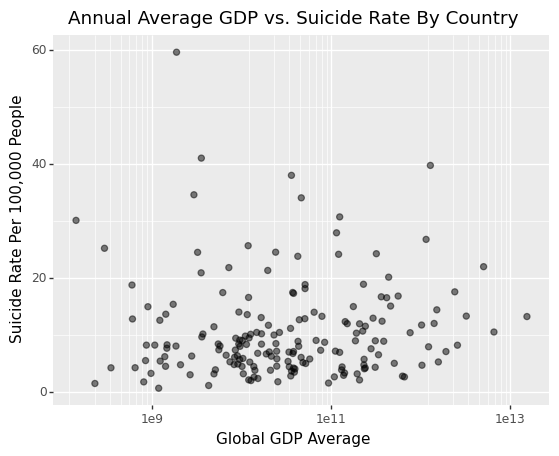

In [13]:
# Annual Average GDP vs. Suicide Rate By Country
splot = ggplot(means_across_country, aes(x='gdp', y='suicides')) +\
    geom_point(size=2, alpha=0.5) +\
    labs(title='Annual Average GDP vs. Suicide Rate By Country',
         x='Global GDP Average',
         y=suicide_label) + scale_x_log10()

print(splot)


This plot shows the relationship between average suicide rate of a country from 2000 to 2019 and the average GDP of a country from 2000 to 2019. For example, one data point might be the average GDP of Canada from 2000 to 2019 plotted against Canada's average suicide rate from 2000 to 2019. There does not appear to be any strong correlation.

### Annual Average GDP Per Capita vs. Suicide Rate By Country

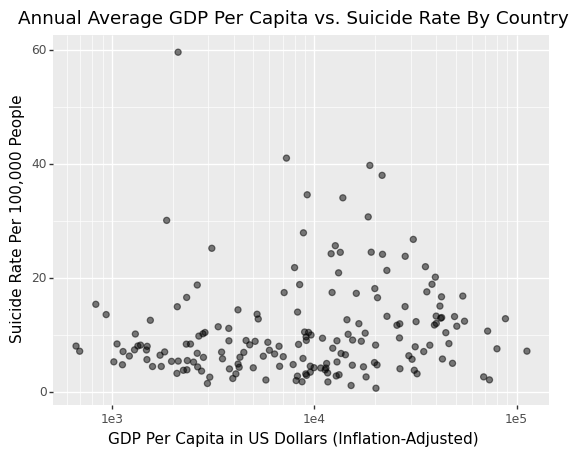

In [14]:
# Annual Average GDP Per Capita vs. Suicide Rate By Country
splot = ggplot(means_across_country, aes(x='gdp_pc', y='suicides')) +\
    geom_point(size=2, alpha=0.5) +\
    labs(title='Annual Average GDP Per Capita vs. Suicide Rate By Country',
         x=gdp_pc_label,
         y=suicide_label) + scale_x_log10()

print(splot)


This plot shows a similar relationship to Annual Average GDP vs. Suicide Rate By Country, except this plot shows average GDP per capita of a country instead of average total GDP. There does not appear to be any strong correlation.

### Annual Average GDP Per Capita vs. Suicide Rate By Year

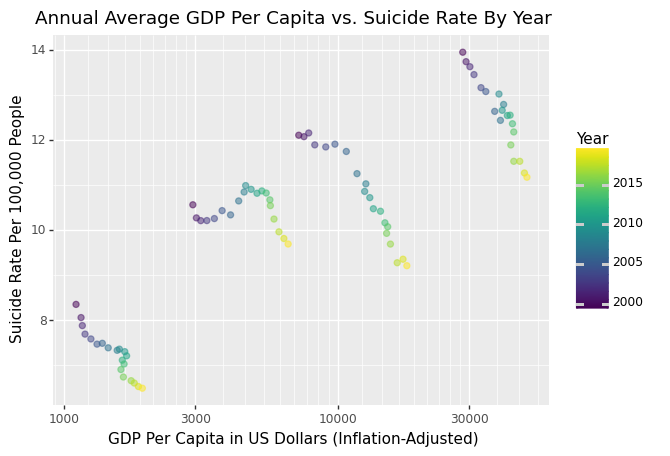

In [15]:
# Annual Average GDP Per Capita vs. Suicide Rate By Year
splot = ggplot(means_across_time, aes(x='gdp_pc', y='suicides', color='year')) +\
    geom_point(size=2, alpha=0.5) +\
    labs(title='Annual Average GDP Per Capita vs. Suicide Rate By Year',
         x=gdp_pc_label,
         y=suicide_label,
         color='Year') + scale_x_log10()

print(splot)

This plot shows the relationship between suicide rate and the average of every country's GDP per capita for a given year. Each year is signified by the color map shown in the legend, where points go from purple to yellow as the year increases. Observe that the plot also shows the different income groups, where each income group is a closely aligned series of downward-trending points. Observe how, while each group trends downward as GDP per capita increases, each successively higher income group has higher rates than the previous income group.


### Suicides Over Time By Income Level

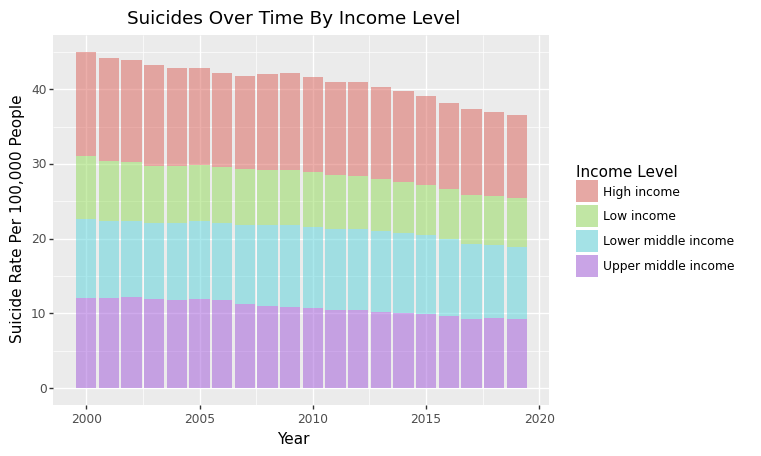

In [16]:
# Suicides Over Time By Income Level
bplot = ggplot(means_across_time, aes(x='year', y='suicides', fill='incomeLevel')) +\
    geom_col(size=0.5, alpha=0.5) +\
    labs(title='Suicides Over Time By Income Level',
         x='Year',
         y=suicide_label,
         fill='Income Level')
print(bplot)

Globally, suicide rates appear to be declining. The high income and upper middle income groups seem to consistently share a larger portion of suicide rates, while low income countries consist of the smallest portion of suicide rates.

### GDP Per Capita vs. Suicides By Income Level

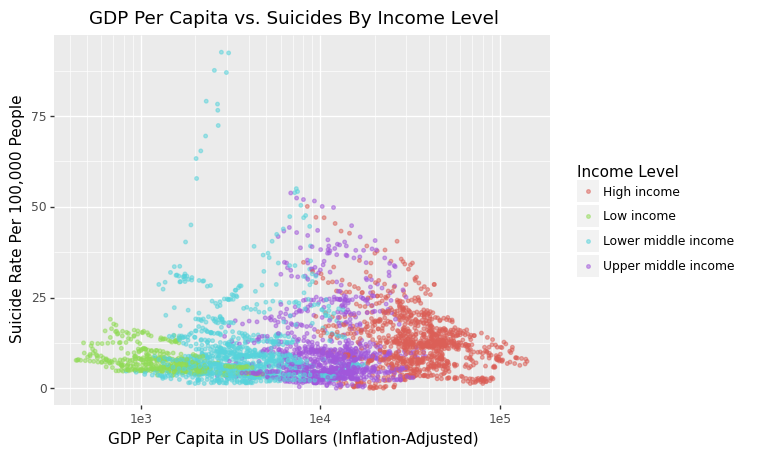

In [17]:
# GDP Per Capita vs. Suicides By Income Level
splot = ggplot(data1, aes(x='gdp_pc', y='suicides', color='incomeLevel')) +\
    geom_point(size=1, alpha=0.5) +\
    labs(title='GDP Per Capita vs. Suicides By Income Level', 
         x=gdp_pc_label,
         y=suicide_label,
         color='Income Level') +\
    scale_x_log10()

print(splot)

This plot shows the relationship between GDP per capita and suicide rates. Interestingly enough, the plot appears to take the shape of a Normal distribution centered around 4000 US dollars.

### Suicides Over Time By Sex

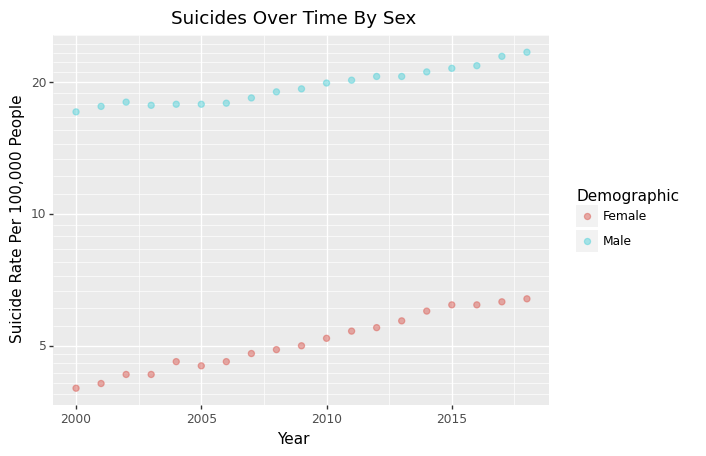

In [18]:
# Suicides Over Time By Sex
splot = ggplot(data2[(data2['STUB_NAME_NUM'] == 2)], aes(x='YEAR', y='ESTIMATE', color='STUB_LABEL')) +\
    geom_point(size=2, alpha=0.5) +\
    labs(title='Suicides Over Time By Sex',
         x='Year',
         y=suicide_label,
         color='Demographic') + scale_y_log10()

print(splot)


This plot shows that suicides in the US are trending upwards over time. There also appears to be a consistent difference between the number of men committing suicide and the number of women committing suicide, with the former category doing so at a much higher rate.

### Suicides Over Time By Sex, Race, And Hispanic Origin

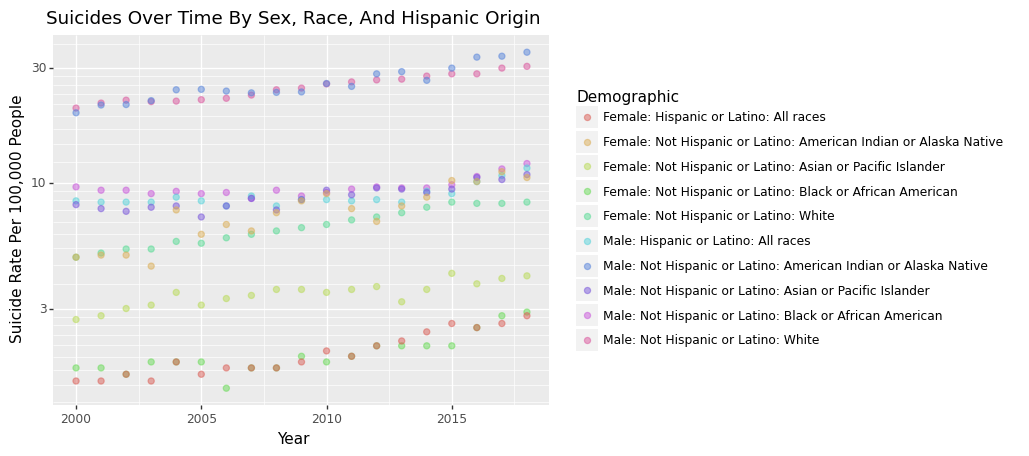

In [19]:
# Suicides Over Time By Sex, Race, And Hispanic Origin
splot = ggplot(data2[(data2['STUB_NAME_NUM'] == 6)], aes(x='YEAR', y='ESTIMATE', color='STUB_LABEL')) +\
    geom_point(size=2, alpha=0.5) +\
    labs(title='Suicides Over Time By Sex, Race, And Hispanic Origin',
         x='Year',
         y=suicide_label,
         color='Demographic') + scale_y_log10()

print(splot)

This plot, like Suicides Over Time By Sex, shows that suicides in the US are trending upwards over time for most demographics. There also appears to be noticeable differences in the rate of suicide bewteen different demographics, with White and American Indian/Alaska Native men committing suicide at the highest rates. The plot also shows Hispanic/Latino women of all races and Black/African American women committing suicide at the lowest rates.

### Suicides Over Time By Age Group

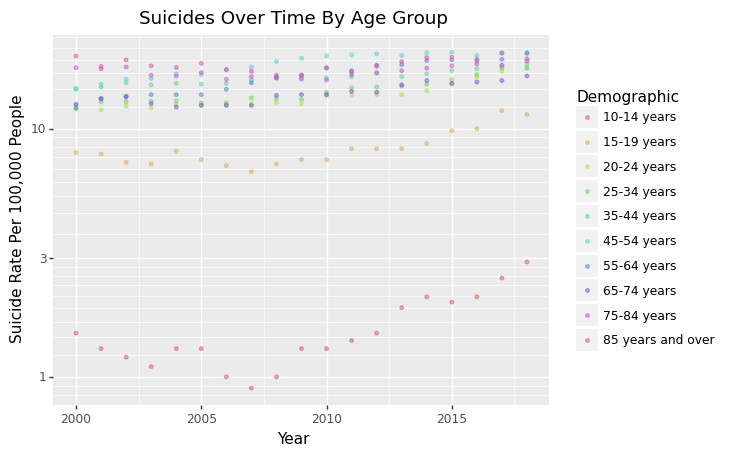

In [20]:
# regex pattern to match specific age categories
age_cat = r'(1[.]\d\d)|(1[.]1)'

# Scatter Plot: Suicides Over Time By Age Group
splot = ggplot(data2[data2['STUB_LABEL_NUM'].astype(str).str.contains(age_cat)], aes(x='YEAR', y='ESTIMATE', color='STUB_LABEL')) +\
    geom_point(size=1, alpha=0.5) +\
    labs(title='Suicides Over Time By Age Group',
         x='Year',
         y=suicide_label,
         color='Demographic') + scale_y_log10()

print(splot)

Suicide rates in the US appear to be increasing over time amongst most age groups. However, it is surprising to note how high the rate of suicide is for older age groups, such as 85 years and over.

### GDP vs Suicide/100,000 people in the United States

,suicide,gdp
3,,
2000.0,11.0,10250900000000.0
2001.0,11.4,10581900000000.0
2002.0,11.8,10929100000000.0
2003.0,11.7,11456400000000.0
2004.0,11.9,12217200000000.0
2005.0,11.9,13039200000000.0
2006.0,12.1,13815600000000.0
2007.0,12.4,14474200000000.0
2008.0,12.7,14769900000000.0


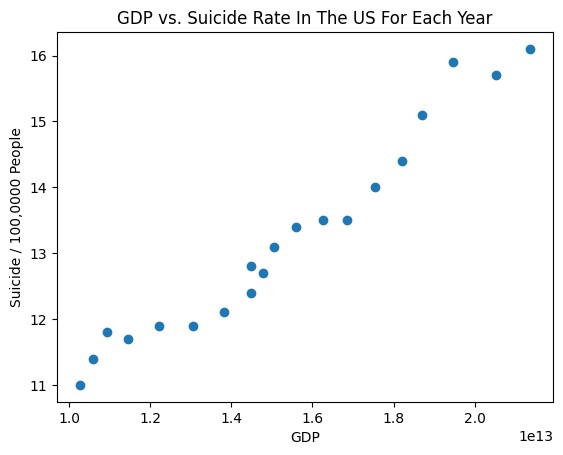

In [21]:
plt.scatter(x=df_final['gdp'], y=df_final['suicide'])
plt.xlabel('GDP')
plt.ylabel('Suicide / 100,0000 People')
plt.title('GDP vs. Suicide Rate In The US For Each Year')
display(df_final)
plt.show()


This scatterplot plots the suicide rate per 100,000 people from the United States versus the GDP (U.S. Dollars) from the course of 2000 to 2019. There seems to be a positive correlation to the data.

### Gini Index vs Suicide/100,000 people in the United States

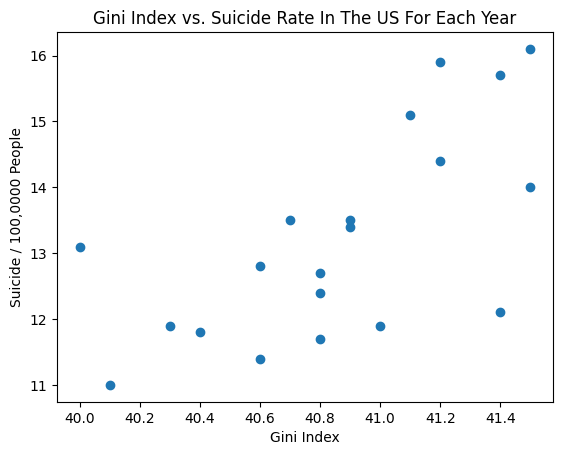

In [22]:
plt.scatter(x=df_final_g['gini'], y=df_final_g['suicide'])
plt.xlabel('Gini Index')
plt.ylabel('Suicide / 100,0000 People')
plt.title('Gini Index vs. Suicide Rate In The US For Each Year')
plt.show()

This plot is a scatterplot of the suicide rate per 100,000 people in the United States versus Gini Index (refer to earlier reference Gini Index). Although there are some outliers, the plot seems to show a positive correlation between the gini index and the number of suicides per 1000,000 people in the United States.

## Analysis, Hypothesis Testing, & Machine Learning

The data visualization gives us several ideas to work with. There appeared to be several interesting relationships that we might want to explore further with models:

1. GDP per capita  vs. Suicide rates
3. Sex/Race vs. Suicide rates in the U.S.
3. Gini Coefficient vs. Suicide rates in the U.S.

There are several Python libraries that we use in this section. The libraries are [Scikit-Learn](https://scikit-learn.org/stable/) and [statsmodels.formula.api](https://www.statsmodels.org/stable/index.html) for linear regression / machine learning models and hypothesis testing.

### Linear Regression for GDP per capita vs. Suicide rates

Let's do a linear regression for GDP per capita and suicide rates of countries. We hypothesize that there is a relationship between the GDP per capita and suicide rates.

In [23]:
# fit linear regression model for gdp per capita vs. suicide rate
regression_model = smf.ols(formula=f'suicides ~ gdp_pc', data=data1).fit()

display(regression_model.summary())


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               suicides   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.548
Date:                Fri, 12 May 2023   Prob (F-statistic):             0.0330
Time:                        23:48:37   Log-Likelihood:                -12781.
No. Observations:                3525   AIC:                         2.557e+04
Df Residuals:                    3523   BIC:                         2.558e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.4824      0.201     52.054      0.000      10.088      10.877
gdp_pc      1.705e-05   7.99e-06      2.133      0.033    1.38e-06    3.27e-05
==============================================================================
Omnibus:                     2175.330   Durbin-Watson:                   0.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29000.515
Skew:                           2.733   Prob(JB):                         0.00
Kurtosis:                      15.945   Cond. No.                     3.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This is interesting because there is a significant relationship between GDP per capita and suicide rates, as the p-value (p = 0.033) is less than 0.05. There is a positive relationship between GDP per capita and suicide rates, which indicates that a country with higher wealth will have higher suicide rates. 

### Linear Regression for Race and Sex vs. Suicide rates in the United States

Let's do a regression model that explores the effects of being a certain demographic on suicide rates. 

In [24]:
# fit linear regression model with interaction term
interaction_model = smf.ols('ESTIMATE ~  STUB_LABEL', data=data2[(data2['STUB_NAME_NUM'] == 6)]).fit()

print(interaction_model.summary())

                            OLS Regression Results                            
Dep. Variable:               ESTIMATE   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     374.8
Date:                Fri, 12 May 2023   Prob (F-statistic):          1.44e-111
Time:                        23:48:37   Log-Likelihood:                -390.67
No. Observations:                 190   AIC:                             801.3
Df Residuals:                     180   BIC:                             833.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

We can see that all the p-values are significant (less than 0.05) except for Non-hispanic or Latino Black Women. The most striking thing from this dataset is that the categories of men have larger coefficients, which indicate that being male increases suicide rates. Additionally, American Indian and White categories have larger coefficients in across both men and women.

### Linear Regression for Gini Coefficient vs. Suicide rates in the United States

Let's do a linear regression for Gini Coefficient and suicide rates of countries. We hypothesize that there is a relationship between the Gini Coefficient and suicide rates.

                            OLS Regression Results                            
Dep. Variable:                suicide   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     13.57
Date:                Fri, 12 May 2023   Prob (F-statistic):            0.00170
Time:                        23:48:37   Log-Likelihood:                -31.044
No. Observations:                  20   AIC:                             66.09
Df Residuals:                      18   BIC:                             68.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -80.6659     25.489     -3.165      0.0

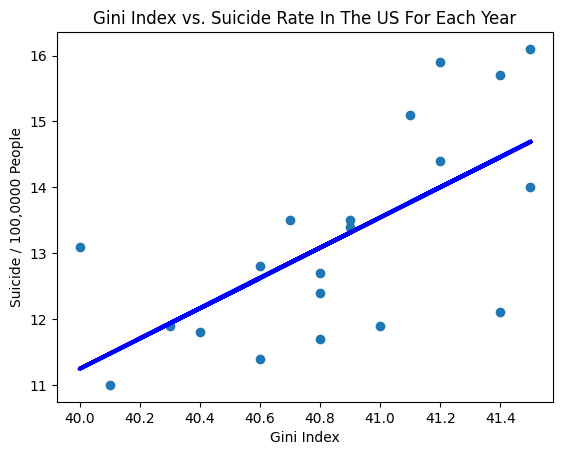

In [25]:
X = df_final_g['gini'].to_numpy().reshape(df_final_g['gini'].shape[0], 1)
y = df_final_g['suicide'].to_numpy().reshape(df_final_g['suicide'].shape[0], 1)
# Performing linear regression on gini vs suicide
linreg = LinearRegression()
mdl = linreg.fit(X,y)
new_y = linreg.predict(X)

# fit linear regression model for gini coefficient vs. suicide rate
regression_model = smf.ols(formula='suicide ~ gini', data=df_final_g.astype('float32')).fit()

print(regression_model.summary())

plt.scatter(x=df_final_g['gini'], y=df_final_g['suicide'])
plt.xlabel('Gini Index')
plt.ylabel('Suicide / 100,0000 People')
plt.title('Gini Index vs. Suicide Rate In The US For Each Year')
plt.plot(X, new_y, color='blue', linewidth=3)
plt.show()

This linear regression model appears to show a significant relationship between the Gini Coefficient and suicide rates in the United States, as the p-value (p = 0.002) is less than 0.05. This suggests that a higher gini coefficient (larger income inequality) in a state causes higher suicide rates. 

## Insight & Policy Decision

From our visualizations, analysis, and models, there are several takeaways:

1. Wealth has an effect on suicide rates. According to the data, as GDP per capita increases there are higher rates of suicide. 
2. Wealth inequality also has an effect on suicide rates. States that have higher Gini Coefficients, meaning more wealth disparity, have higher rates of suicide. 
3. There appear to be differences in suicide rates for different sexes and races. Men have significantly higher suicide rates than women. Additionally, white men and American Indian men have higher suicide rates than other demographics. 

From this, we can provide some suggestions for the next steps to take in preventing suicide. It appears that wealth and wealth disparity play a large role in suicide rates, and certain demographics may be more susceptible to suicide rates. GDP per capita (wealth) is difficult to change quickly, and is something that just increases over time. However, it is intresting to see that suicide rates are positively correlated with GDP per capita, which means that more wealthy countries have higher suicide rates. Wealth disparity, on the other hand, causes higher suicide rates. Income inequality can be changed with policy, as redistributing the wealth of the rich is a possible method that could reduce suicide rates. 

According to [“The Psychology of Sex and Gender”](https://books.google.com/books?id=lX1ZDwAAQBAJ&pg=PT403#v=onepage&q&f=false), women tend to exhibit more “nonfatal suicide behavior, such as suicide ideation, suicide attempts, and self-harm in comparison to males, while males die more frequently from suicide. This corrobarates our findings of men generally being more susceptible to suicide. Providing resources to particular demographics (such as men) that are susceptible to suicide may lessen suicide rates. 

However, we cannot take this all at face value. There may be factors such as illnesses and substance use that may not be represented properly in any dataset. There are countless factors that may contribute to suicide rates, but regardless, this project is important in determining whether certain socioeconomic factors affect suicide rates. It is important to keep researching this issue and continue to take steps in the right direction to prevent more suicides. 

For more about suicide prevention and other resources, visit [here](https://www.cdc.gov/suicide/index.html).
